# 2019-2020 Premier League Season Analysis: How did COVID-19 impact the season?

> ## Annie Rumbles

**Motivation**: As an avid fan of the Premier League, and football in general, I was really curious to use my skillset to analyze this bizarre season. I know there are lots of organizations out there that are picking apart and analyzing these data, but I wanted to have a look for myself. The Premier League season was put on pause due to the COVID-19 pandemic after Gameweek 29 had finished, on March 9th, 2020. Project Restart kicked off for Gameweek 30 on June 17th after a more than three month break to finish the season.

**Data**: I used the combined gameweek dataset of team data from [this](https://www.football-data.co.uk/englandm.php) site that provides a multitude of data, where I mainly just focused on results, points acquired, and goals scored. This analysis simply takes a look at the trends of the seasons with teams. This [note](https://www.football-data.co.uk/notes.txt) allowed me to understand the features better.

In [96]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
import warnings

pd.options.mode.chained_assignment = None
plt.style.use('ggplot')

In [16]:
df = pd.read_csv('../data/E0.csv')
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [28]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.515789,1.205263,0.700000,0.550000,13.323684,11.400000,4.555263,3.994737,10.484211,10.981579,...,2.174132,-0.276974,1.944474,1.960526,1.961053,1.972947,2.013368,2.026921,1.936079,1.950842
std,1.248646,1.200252,0.886427,0.758505,5.417938,5.255278,2.520543,2.489020,3.582759,3.713653,...,0.544434,0.978376,0.129753,0.101650,0.140680,0.105627,0.138995,0.110237,0.127354,0.098890
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.450000,-3.750000,1.670000,1.270000,1.710000,1.300000,1.800000,1.300000,1.700000,1.280000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.800000,-0.750000,1.870000,1.890000,1.880000,1.890000,1.930000,1.950000,1.860000,1.880000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,10.000000,11.000000,...,2.040000,-0.250000,1.950000,1.970000,1.960000,1.970000,2.000000,2.030000,1.930000,1.950000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,13.000000,13.000000,...,2.400000,0.250000,2.020000,2.040000,2.032500,2.050000,2.070000,2.100000,2.000000,2.020000
max,8.000000,9.000000,5.000000,5.000000,31.000000,26.000000,13.000000,15.000000,23.000000,24.000000,...,5.770000,3.000000,3.550000,2.200000,3.930000,2.290000,3.950000,2.300000,3.660000,2.240000


There are more than 100 columns in this dataset and many of the features have to do with betting odds or other extraneous details that I wasn't interested in for my analysis. So I created a trimmed down dataframe containing features that I wanted to work with (df_trim).

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


In [29]:
df_trim = df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS', 'FTR']]
df_trim.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,FTR
0,Liverpool,Norwich,4,1,15,12,H
1,West Ham,Man City,0,5,5,14,A
2,Bournemouth,Sheffield United,1,1,13,8,D
3,Burnley,Southampton,3,0,10,11,H
4,Crystal Palace,Everton,0,0,6,10,D


In [30]:
teams = df_trim['HomeTeam'].unique()
colors = ['red', 'deepskyblue', 'maroon', 'cornflowerblue', 'orangered','yellow', 'cadetblue', 'blue', 
            'mediumblue', 'firebrick', 'salmon', 'gold', 'steelblue', 'navy', 'brown', 'royalblue', 
            'darkgrey', 'darkgoldenrod', 'dodgerblue', 'crimson']
color_dict = {x:y for x, y in zip(teams, colors)}

In [31]:
def get_cumsum_pts_dict(teams, df):
    '''
    Get the point total for each gameweek and cumulative point total throughout all gameweeks.
    
    3 points for a win, 1 point for a draw, 0 points for a loss.
    
    Input: teams (list of strings): List of teams to iterate through
           df (pandas dataframe): Dataframe to work with
    Output: points (dict): Dictionary of point totals
            cumsums(dict): Dictionary of cumulative point totals
    '''
    cumsums = {}
    points = {}
    for t in teams:
        new_df = df.loc[(df['HomeTeam']==t) | (df['AwayTeam']==t)]
        pts = []
        for i in range(len(new_df)):
            if (new_df['HomeTeam'].iloc[i]==t) & (new_df['FTR'].iloc[i]=='H'):
                pts.append(3)
            elif (new_df['HomeTeam'].iloc[i]==t) & (new_df['FTR'].iloc[i]=='A'):
                pts.append(0)
            elif (new_df['AwayTeam'].iloc[i]==t) & (new_df['FTR'].iloc[i]=='A'):
                pts.append(3)
            elif (new_df['AwayTeam'].iloc[i]==t) & (new_df['FTR'].iloc[i]=='H'):
                pts.append(0)
            else:
                pts.append(1)
        new_df['pts']=pts
        points[t] = new_df['pts']
        cumsums[t] = new_df['pts'].cumsum()
    return points, cumsums

In [32]:
points, cumsums = get_cumsum_pts_dict(teams, df_trim)

This is what the above function created, whether the team won, lost, or drew during any given week and the associated points, and how those points accumulated throughout the season.

In [81]:
print('Liverpool:')
for i, (p, c) in enumerate(zip(points['Liverpool'].values, cumsums['Liverpool'])):
    print(f"Gameweek {i+1}: {p} pts\t and cumulative points: {c} pts")

Liverpool:
Gameweek 1: 3 pts	 and cumulative points: 3 pts
Gameweek 2: 3 pts	 and cumulative points: 6 pts
Gameweek 3: 3 pts	 and cumulative points: 9 pts
Gameweek 4: 3 pts	 and cumulative points: 12 pts
Gameweek 5: 3 pts	 and cumulative points: 15 pts
Gameweek 6: 3 pts	 and cumulative points: 18 pts
Gameweek 7: 3 pts	 and cumulative points: 21 pts
Gameweek 8: 3 pts	 and cumulative points: 24 pts
Gameweek 9: 1 pts	 and cumulative points: 25 pts
Gameweek 10: 3 pts	 and cumulative points: 28 pts
Gameweek 11: 3 pts	 and cumulative points: 31 pts
Gameweek 12: 3 pts	 and cumulative points: 34 pts
Gameweek 13: 3 pts	 and cumulative points: 37 pts
Gameweek 14: 3 pts	 and cumulative points: 40 pts
Gameweek 15: 3 pts	 and cumulative points: 43 pts
Gameweek 16: 3 pts	 and cumulative points: 46 pts
Gameweek 17: 3 pts	 and cumulative points: 49 pts
Gameweek 18: 3 pts	 and cumulative points: 52 pts
Gameweek 19: 3 pts	 and cumulative points: 55 pts
Gameweek 20: 3 pts	 and cumulative points: 58 pts
G

## Point totals throughout the season:
The below plot is a visualization for each team and how they performed throughout the season. The black dotted line dilineates where the season restarted after a three month absence due to the COVID-19 pandemic.

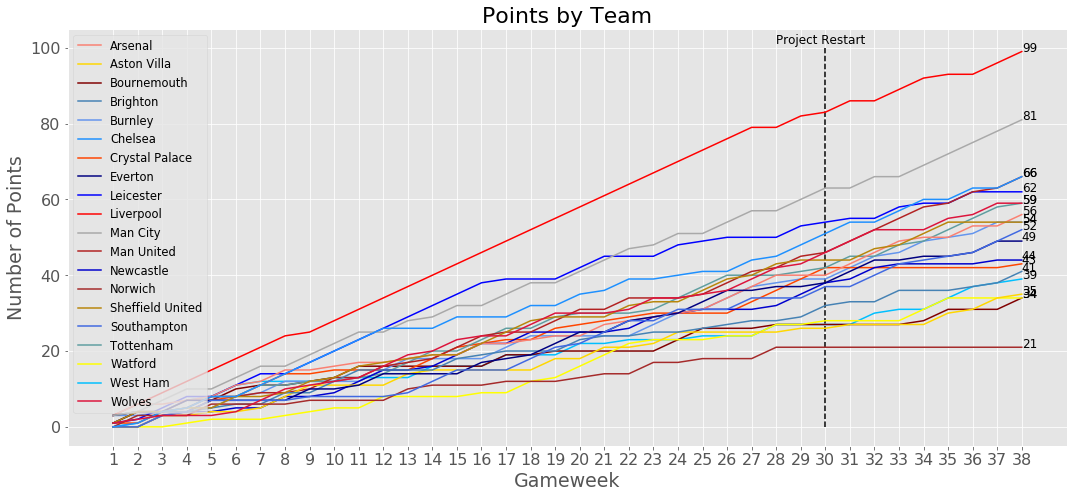

In [74]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
for i, t in enumerate(teams):
    ax.plot(range(1,39), cumsums[t], label=t, color=colors[i])
    ax.annotate(cumsums[t].values[-1], xy=(38, cumsums[t].values[-1]), fontsize=12)
ax.set_title('Points by Team', fontsize=22)
ax.set_xlabel('Gameweek', fontsize=19)
ax.set_ylabel('Number of Points', fontsize=19)
ax.set_xticks(range(1,39))
ax.legend()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, fontsize=11.5)
plt.tick_params(labelsize=16)
plt.tight_layout(pad=1)
ax.vlines(30, ymin=0, ymax=100, ls='--')
ax.annotate('Project Restart', xy=(28, 101), fontsize=12);

In [35]:
def get_gs_dict(teams, df):
    '''
    Get a dictionary for goals scored per gameweek for each team.
    
    Input: teams (list of strings): List of teams to iterate through
           df (pandas dataframe): Dataframe to work with
    Output: stats (dict): Dictionary of goals scored
    '''
    stats = {}
    for t in teams:
        new_df = df[(df['HomeTeam']==t) | (df['AwayTeam']==t)]
        s = []
        for i in range(len(new_df)):
            if new_df['HomeTeam'].iloc[i]==t:
                s.append(new_df.iloc[i]['FTHG'])
            elif new_df['AwayTeam'].iloc[i]==t:
                s.append(new_df.iloc[i]['FTAG'])
            else:
                continue
        stats[t] = s
    return stats

In [37]:
goals_scored_dict = get_gs_dict(teams, df_trim)

The above function created a dictionary of goals scored during each gameweek for each team as can be seen below.

In [93]:
print('Liverpool scored:')
for i, g in enumerate(goals_scored_dict['Liverpool']):
    print(f"{g} goals in gameweek {i+1}")

Liverpool scored:
4 goals in gameweek 1
2 goals in gameweek 2
3 goals in gameweek 3
3 goals in gameweek 4
3 goals in gameweek 5
2 goals in gameweek 6
1 goals in gameweek 7
2 goals in gameweek 8
1 goals in gameweek 9
2 goals in gameweek 10
2 goals in gameweek 11
3 goals in gameweek 12
2 goals in gameweek 13
2 goals in gameweek 14
5 goals in gameweek 15
3 goals in gameweek 16
2 goals in gameweek 17
4 goals in gameweek 18
1 goals in gameweek 19
2 goals in gameweek 20
1 goals in gameweek 21
2 goals in gameweek 22
2 goals in gameweek 23
2 goals in gameweek 24
4 goals in gameweek 25
1 goals in gameweek 26
3 goals in gameweek 27
0 goals in gameweek 28
2 goals in gameweek 29
0 goals in gameweek 30
4 goals in gameweek 31
0 goals in gameweek 32
2 goals in gameweek 33
3 goals in gameweek 34
1 goals in gameweek 35
1 goals in gameweek 36
5 goals in gameweek 37
3 goals in gameweek 38


The top-six teams qualify for various competitions in the next season, and the bottom three teams are relegated to the tier below the Premier League, so I highlighted these for the plot below.

In [41]:
top_6 = ['Liverpool', 'Man City', 'Man United', 'Chelsea', 'Leicester', 'Tottenham']
relegated = ['Watford', 'Norwich', 'Bournemouth']

## Goals scored throughout the season:

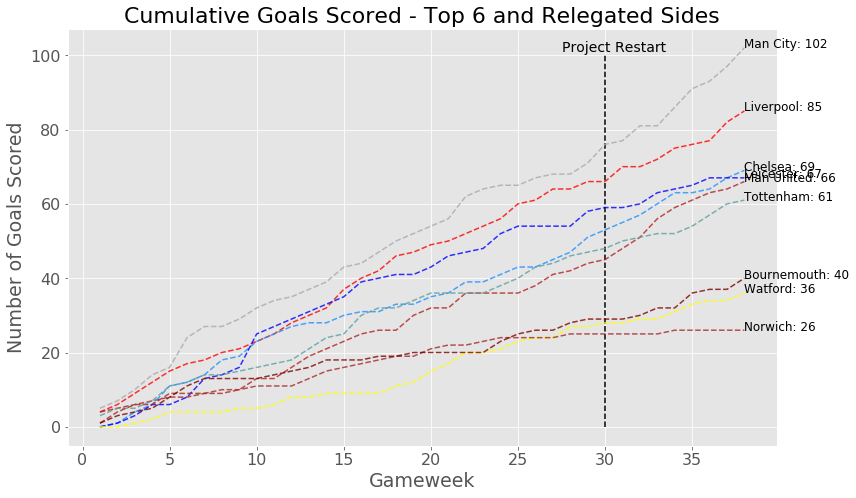

In [43]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
for t in top_6+relegated:
    c = np.array(goals_scored_dict[t])
    ax.plot(range(1,39), np.cumsum(c), ls='--', color=color_dict[t], alpha=.8)
    ax.annotate(f'{t}: {np.cumsum(c)[-1]}', xy=(38, np.cumsum(c)[-1]), fontsize=12)
ax.set_title('Cumulative Goals Scored - Top 6 and Relegated Sides', fontsize=22)
ax.set_xlabel('Gameweek', fontsize=19)
ax.set_ylabel('Number of Goals Scored', fontsize=19)
ax.vlines(30, ymin=0, ymax=100, ls='--')
ax.annotate('Project Restart', xy=(27.5, 101), fontsize=14)
plt.tick_params(labelsize=16)
plt.tight_layout(pad=1)

## Creating a sorted table for the final placement of each teams:

In [47]:
def make_table(cumsum_dict):
    '''
    Create a sorted table of teams and final point tallies.
    
    Input: cumsum_dict (dict): Dictionary of cumulative sums of points
    Output: table (dict): Dictionary of each team and their final point tally in order from highest to lowest
    '''
    table = {t:cumsum_dict[t].iloc[-1] for t in cumsum_dict.keys()}
    table = {k: v for k, v in sorted(table.items(), key=lambda item: item[1], reverse=True)}
    return table

In [94]:
table = make_table(cumsums)
for t, p in table.items():
    print(f'{t}: {p} points')

Liverpool: 99 points
Man City: 81 points
Man United: 66 points
Chelsea: 66 points
Leicester: 62 points
Tottenham: 59 points
Wolves: 59 points
Arsenal: 56 points
Burnley: 54 points
Sheffield United: 54 points
Southampton: 52 points
Everton: 49 points
Newcastle: 44 points
Crystal Palace: 43 points
Brighton: 41 points
West Ham: 39 points
Aston Villa: 35 points
Bournemouth: 34 points
Watford: 34 points
Norwich: 21 points


In [50]:
# Sorted color dictionary
sorted_color_dict = {k:color_dict[k] for k,v in table.items()}

## Create pre/post COVID-19 shutdown points per game dictionaries
In order to get an idea of before and after the shutdown for comparisons, I created dictionaries for the average points per game for each team before and after the restart.

In [54]:
def make_pre_post_tables(points_dict):
    '''
    Create sorted dictionaries of points per game for both before and after the shutdown.
    
    Input: points_dict (dict): Dictionary created above of teams and their points over all gameweeks
    Output: sorted_pre (dict): Dictionary of average points per game for each team BEFORE the shutdown
            sorted_post (dict): Dictionary of average points per game for each team AFTER the shutdown 
    '''
    pre = {t:points[t].values[0:29].mean() for t in points.keys()}
    post = {t:points[t].values[29:].mean() for t in points.keys()}
    sorted_pre = {k:pre[k] for k,v in table.items()}
    sorted_post = {k:post[k] for k,v in table.items()}
    return sorted_pre, sorted_post

In [55]:
pre_shutdown, post_shutdown = make_pre_post_tables(points)

In [95]:
print('Average points per game BEFORE the shutdown:')
for t, p in pre_shutdown.items():
    print(f'{t}: {round(p, 3)}')

Average points per game BEFORE the shutdown:
Liverpool: 2.828
Man City: 2.069
Man United: 1.552
Chelsea: 1.655
Leicester: 1.828
Tottenham: 1.414
Wolves: 1.483
Arsenal: 1.379
Burnley: 1.345
Sheffield United: 1.517
Southampton: 1.172
Everton: 1.276
Newcastle: 1.207
Crystal Palace: 1.345
Brighton: 1.0
West Ham: 0.931
Aston Villa: 0.897
Bournemouth: 0.931
Watford: 0.931
Norwich: 0.724


## Teams average points per game before and after the restart:
How did each team fare in regards to points per game after the league started back up again.

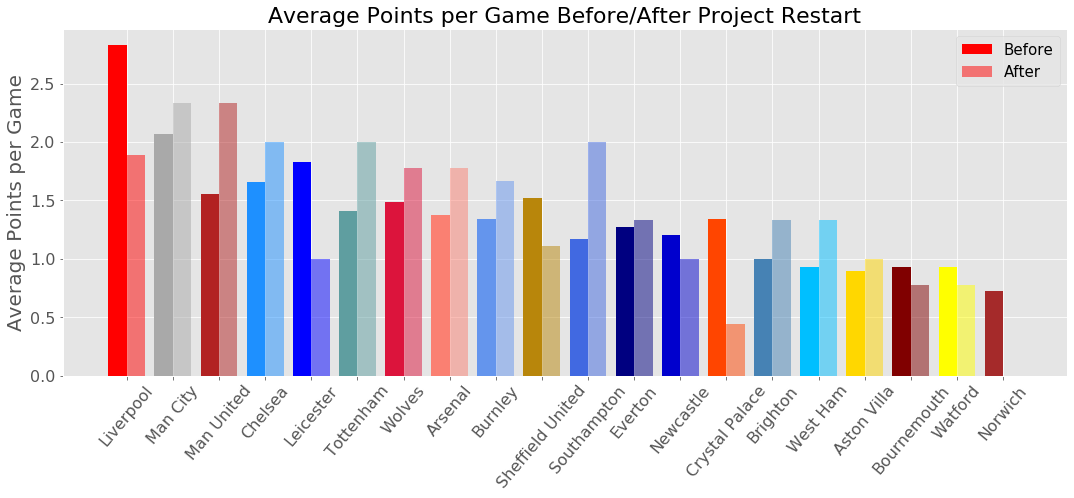

In [60]:
width = .4
xlocs = np.arange(len(pre_shutdown.keys()))
fig, ax = plt.subplots(1,1,figsize=(15,7))
ax.bar(xlocs-width, pre_shutdown.values(), color=sorted_color_dict.values(), width=.4, label='Before')
ax.bar(xlocs, post_shutdown.values(), color=sorted_color_dict.values(), width=.4, alpha=.5, label='After')
ax.set_xticks(ticks=xlocs-.2)
ax.set_xticklabels(pre_shutdown.keys(), rotation=50)
ax.set_title('Average Points per Game Before/After Project Restart', fontsize=22)
ax.set_ylabel('Average Points per Game', fontsize=20)
plt.tick_params(labelsize=16)
plt.tight_layout(pad=1)
ax.legend(fontsize=15);

## Preliminary Statistical Analysis of Average Points per Game
I ran a T-test of two independent samples of points for each team using the function below.

In [109]:
def ttest_ppg(points_dict):
    '''
    Perform a two-sample t-test on the average points per game before and after the restart for all teams.
    
    Input: teams (list): List of teams
           points_dict (dict): Dictionary of teams and points per gameweek
    Output: p_values (dict): Dictionary of teams and their resultant p-values from the t-test
    '''
    p_values = {}
    for team in points_dict.keys():
        t, p = ttest_ind(points_dict[team][0:29], points_dict[team][30:], equal_var=True)
        p_values[team]= p
    return p_values

In [111]:
p_vals = ttest_ppg(points)

In [112]:
for t, p in p_vals.items():
    if p <= .05:
        print(f"For an alpha set to .05, {t}'s points per game average change was statistically significant with a p-value of: {round(p, 3)}.\nTheir points per game average went from {round(points[t][0:29].mean(), 3)} ppg to {round(points[t][30:].mean(), 3)} ppg.")
    if .05 <= p <= .1:
        print(f"For an alpha set to .1, {t}'s points per game average change was statistically significant with a p-value of: {round(p, 3)}.\nTheir points per game average went from {round(points[t][0:29].mean(), 3)} ppg to {round(points[t][30:].mean(), 3)} ppg.")

For an alpha set to .01, Liverpool's points per game average change was statistically significant with a p-value of: 0.022.
Their points per game average went from 2.828 ppg to 2.0 ppg.
For an alpha set to .01, Crystal Palace's points per game average change was statistically significant with a p-value of: 0.013.
Their points per game average went from 1.345 ppg to 0.125 ppg.
For an alpha set to .1, Man United's points per game average change was statistically significant with a p-value of: 0.062.
Their points per game average went from 1.552 ppg to 2.5 ppg.
For an alpha set to .1, Norwich's points per game average change was statistically significant with a p-value of: 0.082.
Their points per game average went from 0.724 ppg to 0.0 ppg.


**Analysis**: I wanted to have a look at how teams were faring both before and after the restart. The plot above shows this. As you can see, Liverpool, the eventual Champions, had a pretty dramatic dip in performance after the restart, but this didn't stop them as they clinched the title shortly after the restart. Leicester, Crystal Palace and Norwich also had extreme declines in performance, leading to Norwich's relegation. Some notable improvements can be seen with Manchester United, jumping from ~1.5 points per game, to just beneath 2.5 points per game. Southampton had an even larger performance gain, increasing their average by over .8 points per game. However, the only statistically significant changes were for Liverpool, surprisingly, and Crystal Palace with an alpha set to .05. With more lenience in the alpha value, other teams showed some significant performance changes which can be seen above.

**Future Work**: I plan to also perform similar tests to the amount of goals scored before and after the restart. Additionally, I want to take a look at individual players and their performances and see if there was any significant change there.